In [1]:


%%capture 
%load_ext autoreload
%autoreload 2

!pip install -e ..


from gym_vrp.envs.vrp import VRPEnv, VRPVariant
from gym_vrp.graph.graph import VRPGraph

env = VRPEnv.create(variant=VRPVariant.DEFAULT_VRP)


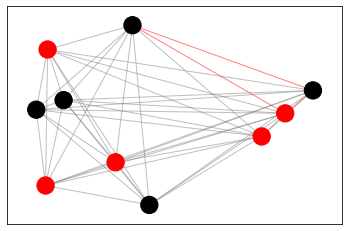

In [2]:
import matplotlib.pyplot as plt

graph = VRPGraph(10, 5)

graph.color_edge(0, 1)
graph.color_edge(1, 2)
graph.color_edge(2, 0)

ax = plt.subplot(1,1,1)
graph.draw(ax)

In [3]:
%matplotlib inline

from gym_vrp.envs.vrp import DefaultVRPEnv
import numpy as np
from IPython import display

actions = np.array([1]*2)[:, None]
network = DefaultVRPEnv(num_nodes=10, batch_size=2, num_draw=2)
network.step(actions)
img = network.render()
display.clear_output(wait=True)
actions = np.array([2]*2)[:, None]
network.step(actions)
img = network.render()


(array([[[0.40157872, 0.59582391, 0.        , 0.        ],
         [0.16174899, 0.8603238 , 0.        , 1.        ],
         [0.1430533 , 0.28132229, 1.        , 1.        ],
         [0.66428121, 0.25002847, 0.        , 0.        ],
         [0.62663939, 0.09378882, 0.        , 0.        ],
         [0.01938707, 0.08170179, 0.        , 0.        ],
         [0.19622809, 0.9080161 , 0.        , 0.        ],
         [0.65870064, 0.10098627, 0.        , 0.        ],
         [0.8154266 , 0.60759863, 0.        , 0.        ],
         [0.80881659, 0.70710281, 0.        , 0.        ]],
 
        [[0.38766629, 0.33544621, 0.        , 0.        ],
         [0.51322212, 0.98769111, 0.        , 1.        ],
         [0.53091437, 0.68043616, 0.        , 1.        ],
         [0.39113473, 0.1165562 , 0.        , 0.        ],
         [0.70722573, 0.41361609, 1.        , 0.        ],
         [0.45603303, 0.33195254, 0.        , 0.        ],
         [0.09371524, 0.4577167 , 0.        , 0.     

In [ ]:
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder

env = DefaultVRPEnv(num_nodes=10, batch_size=12, num_draw=9)
vid = VideoRecorder(env, "../videos/test.mp4")
vid.frames_per_sec = 1


env.reset()
actions = np.asarray([1]*12)[:, None]
env.step(actions)
env.render()
vid.capture_frame()
actions = np.asarray([2]*12)[:, None]
env.step(actions)
env.render()
vid.capture_frame()
actions = np.asarray([3]*12)[:, None]
env.step(actions)
env.render()
vid.capture_frame()

vid.close()
env.close()